### Analyzing Chess Tournament Results

Xiaolan Li

# Introduction
In this project, I am going to use regex and data parsing skills to generates a .CSV file with the following information
for each of the chess players from a formatted text file:


Player’s Name, Player’s State, Total Number of Points, Player’s Pre-Rating, and Average Pre Tournament Chess Rating of 
Opponents

# Prepare Data

Import the pandas library and read raw data


Transform the dataframe to string type in order to use regex skills

In [1]:
import pandas as pd
df_orig= pd.read_csv('https://raw.githubusercontent.com/xiaolancara/AIM-5001/master/data/tournamentinfo.txt')
df_orig = df_orig.to_string()
df_orig

'      -----------------------------------------------------------------------------------------\n0     Pair | Player Name                     |Total|Round|Round|Round|Round|Round|Round|Round| \n1     Num  | USCF ID / Rtg (Pre->Post)       | Pts |  1  |  2  |  3  |  4  |  5  |  6  |  7  | \n2     -----------------------------------------------------------------------------------------\n3         1 | GARY HUA                        |6.0  |W  39|W  21|W  18|W  14|W   7|D  12|D   4|\n4        ON | 15445895 / R: 1794   ->1817     |N:2  |W    |B    |W    |B    |W    |B    |W    |\n5     -----------------------------------------------------------------------------------------\n6         2 | DAKSHESH DARURI                 |6.0  |W  63|W  58|L   4|W  17|W  16|W  20|W   7|\n7        MI | 14598900 / R: 1553   ->1663     |N:2  |B    |W    |B    |W    |B    |W    |B    |\n8     -----------------------------------------------------------------------------------------\n9         3 | ADITYA BAJAJ   

We can tell that the text file includes many dash line<br>
Purpose: I will split the data with dash line.

Approach: As we can see, all dash line format is some spaces follow with a lot of dashes and no other information has this kind of format. The pattern should be r'[\s]+[-]+[-]' <br>
After using the regex, the string is transformed into array.

In [2]:
import re
arr_noDashLine = re.split(r'[\s]+[-]+[-]',df_orig)
arr_noDashLine

['',
 '\n0     Pair | Player Name                     |Total|Round|Round|Round|Round|Round|Round|Round| \n1     Num  | USCF ID / Rtg (Pre->Post)       | Pts |  1  |  2  |  3  |  4  |  5  |  6  |  7  | \n2',
 '\n3         1 | GARY HUA                        |6.0  |W  39|W  21|W  18|W  14|W   7|D  12|D   4|\n4        ON | 15445895 / R: 1794   ->1817     |N:2  |W    |B    |W    |B    |W    |B    |W    |\n5',
 '\n6         2 | DAKSHESH DARURI                 |6.0  |W  63|W  58|L   4|W  17|W  16|W  20|W   7|\n7        MI | 14598900 / R: 1553   ->1663     |N:2  |B    |W    |B    |W    |B    |W    |B    |\n8',
 '\n9         3 | ADITYA BAJAJ                    |6.0  |L   8|W  61|W  25|W  21|W  11|W  13|W  12|\n10       MI | 14959604 / R: 1384   ->1640     |N:2  |W    |B    |W    |B    |W    |B    |W    |\n11',
 '\n12        4 | PATRICK H SCHILLING             |5.5  |W  23|D  28|W   2|W  26|D   5|W  19|D   1|\n13       MI | 12616049 / R: 1716   ->1744     |N:2  |W    |B    |W    |B    |W    |B 

Purpose: As we can see, the first and the last list are empty, we should delete them.
    
Approach: I will import numpy library and use delete function to delete them.

In [3]:
import numpy as np
arr_noDashLine = np.delete(arr_noDashLine, 0)
arr_noDashLine = np.delete(arr_noDashLine, len(arr_noDashLine)-1)
#arr_noDashLine

Purpose: split the data with '|'

Approach: I will transform the array into series and use split function. 

In [4]:
series_noDashLine = pd.Series(arr_noDashLine)
series = series_noDashLine.str.split('|', expand=True)
series

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,\n0 Pair,Player Name,Total,Round,Round,Round,Round,Round,Round,Round,...,USCF ID / Rtg (Pre->Post),Pts,1,2,3,4,5,6,7,\n2
1,\n3 1,GARY HUA,6.0,W 39,W 21,W 18,W 14,W 7,D 12,D 4,...,15445895 / R: 1794 ->1817,N:2,W,B,W,B,W,B,W,\n5
2,\n6 2,DAKSHESH DARURI,6.0,W 63,W 58,L 4,W 17,W 16,W 20,W 7,...,14598900 / R: 1553 ->1663,N:2,B,W,B,W,B,W,B,\n8
3,\n9 3,ADITYA BAJAJ,6.0,L 8,W 61,W 25,W 21,W 11,W 13,W 12,...,14959604 / R: 1384 ->1640,N:2,W,B,W,B,W,B,W,\n11
4,\n12 4,PATRICK H SCHILLING,5.5,W 23,D 28,W 2,W 26,D 5,W 19,D 1,...,12616049 / R: 1716 ->1744,N:2,W,B,W,B,W,B,B,\n14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,\n180 60,JULIA SHEN,1.5,L 33,L 34,D 45,D 42,L 24,H,U,...,14579262 / R: 967 -> 984,,W,B,B,W,B,,,\n182
61,\n183 61,JEZZEL FARKAS,1.5,L 32,L 3,W 54,L 47,D 42,L 30,L 37,...,15771592 / R: 955P11-> 979P18,,B,W,B,W,B,W,B,\n185
62,\n186 62,ASHWIN BALAJI,1.0,W 55,U,U,U,U,U,U,...,15219542 / R: 1530 ->1535,,B,,,,,,,\n188
63,\n189 63,THOMAS JOSEPH HOSMER,1.0,L 2,L 48,D 49,L 43,L 45,H,U,...,15057092 / R: 1175 ->1125,,W,B,W,B,B,,,\n191


Purpose: Next, I will use the row 0 as header. 

Approach: I should transform the series to dataframe format again. Then I will use iloc functionto get first row and column functionto set column.

In [5]:
# show all hiden columns
pd.set_option('display.max_columns', None)

df = pd.DataFrame(series)
header = df.iloc[0]
df = df[1:]
df.columns = header
df

,\n0 Pair,Player Name,Total,Round,Round,Round,Round,Round,Round,Round,\n1 Num,USCF ID / Rtg (Pre->Post),Pts,1,2,3,4,5,6,7,\n2
1,\n3 1,GARY HUA,6.0,W 39,W 21,W 18,W 14,W 7,D 12,D 4,\n4 ON,15445895 / R: 1794 ->1817,N:2,W,B,W,B,W,B,W,\n5
2,\n6 2,DAKSHESH DARURI,6.0,W 63,W 58,L 4,W 17,W 16,W 20,W 7,\n7 MI,14598900 / R: 1553 ->1663,N:2,B,W,B,W,B,W,B,\n8
3,\n9 3,ADITYA BAJAJ,6.0,L 8,W 61,W 25,W 21,W 11,W 13,W 12,\n10 MI,14959604 / R: 1384 ->1640,N:2,W,B,W,B,W,B,W,\n11
4,\n12 4,PATRICK H SCHILLING,5.5,W 23,D 28,W 2,W 26,D 5,W 19,D 1,\n13 MI,12616049 / R: 1716 ->1744,N:2,W,B,W,B,W,B,B,\n14
5,\n15 5,HANSHI ZUO,5.5,W 45,W 37,D 12,D 13,D 4,W 14,W 17,\n16 MI,14601533 / R: 1655 ->1690,N:2,B,W,B,W,B,W,B,\n17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,\n180 60,JULIA SHEN,1.5,L 33,L 34,D 45,D 42,L 24,H,U,\n181 MI,14579262 / R: 967 -> 984,,W,B,B,W,B,,,\n182
61,\n183 61,JEZZEL FARKAS,1.5,L 32,L 3,W 54,L 47,D 42,L 30,L 37,\n184 ON,15771592 / R: 955P11-> 979P18,,B,W,B,W,B,W,B,\n185
62,\n186 62,ASHWIN BALAJI,1.0,W 55,U,U,U,U,U,U,\n187 MI,15219542 / R: 1530 ->1535,,B,,,,,,,\n188
63,\n189 63,THOMAS JOSEPH HOSMER,1.0,L 2,L 48,D 49,L 43,L 45,H,U,\n190 MI,15057092 / R: 1175 ->1125,,W,B,W,B,B,,,\n191


The '\n0 Pair' and '\n1 Num' columns are not we expected.<br>
Purpose: I will seperate one columns into two columns individually and then delete the columns which not contain useful information.

Approach: I will check how the columns looks like, then use split function to split the column with space into two new columns and drop old column.

In [6]:
df.columns

Index(['\n0     Pair ', ' Player Name                     ', 'Total', 'Round',
       'Round', 'Round', 'Round', 'Round', 'Round', 'Round', ' \n1     Num  ',
       ' USCF ID / Rtg (Pre->Post)       ', ' Pts ', '  1  ', '  2  ', '  3  ',
       '  4  ', '  5  ', '  6  ', '  7  ', ' \n2'],
      dtype='object', name=0)

All columns name have a lot of spaces, I will drop all spaces first.

In [7]:
df.columns = df.columns.str.replace(' +', '') 
df.columns

Index(['\n0Pair', 'PlayerName', 'Total', 'Round', 'Round', 'Round', 'Round',
       'Round', 'Round', 'Round', '\n1Num', 'USCFID/Rtg(Pre->Post)', 'Pts',
       '1', '2', '3', '4', '5', '6', '7', '\n2'],
      dtype='object', name=0)

Then I will split the first column into two new columns and drop old one.

In [8]:
# dropping null value columns to avoid errors 
df.dropna(inplace = True) 
  
# new data frame with split value columns 
df[["\n0","Pair"]] = df["\n0Pair"].str.split(" ", n = 1, expand = True) 
df[["\n1","Number"]] = df["\n1Num"].str.split(" ", n = 1, expand = True) 
  
# Dropping old Name columns 
df.drop(columns =["\n0Pair"], inplace = True) 
df.drop(columns =["\n1Num"], inplace = True) 
df

,PlayerName,Total,Round,Round,Round,Round,Round,Round,Round,USCFID/Rtg(Pre->Post),Pts,1,2,3,4,5,6,7,\n2,\n0,Pair,\n1,Number
1,GARY HUA,6.0,W 39,W 21,W 18,W 14,W 7,D 12,D 4,15445895 / R: 1794 ->1817,N:2,W,B,W,B,W,B,W,\n5,\n3,1,\n4,ON
2,DAKSHESH DARURI,6.0,W 63,W 58,L 4,W 17,W 16,W 20,W 7,14598900 / R: 1553 ->1663,N:2,B,W,B,W,B,W,B,\n8,\n6,2,\n7,MI
3,ADITYA BAJAJ,6.0,L 8,W 61,W 25,W 21,W 11,W 13,W 12,14959604 / R: 1384 ->1640,N:2,W,B,W,B,W,B,W,\n11,\n9,3,\n10,MI
4,PATRICK H SCHILLING,5.5,W 23,D 28,W 2,W 26,D 5,W 19,D 1,12616049 / R: 1716 ->1744,N:2,W,B,W,B,W,B,B,\n14,\n12,4,\n13,MI
5,HANSHI ZUO,5.5,W 45,W 37,D 12,D 13,D 4,W 14,W 17,14601533 / R: 1655 ->1690,N:2,B,W,B,W,B,W,B,\n17,\n15,5,\n16,MI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,JULIA SHEN,1.5,L 33,L 34,D 45,D 42,L 24,H,U,14579262 / R: 967 -> 984,,W,B,B,W,B,,,\n182,\n180,60,\n181,MI
61,JEZZEL FARKAS,1.5,L 32,L 3,W 54,L 47,D 42,L 30,L 37,15771592 / R: 955P11-> 979P18,,B,W,B,W,B,W,B,\n185,\n183,61,\n184,ON
62,ASHWIN BALAJI,1.0,W 55,U,U,U,U,U,U,15219542 / R: 1530 ->1535,,B,,,,,,,\n188,\n186,62,\n187,MI
63,THOMAS JOSEPH HOSMER,1.0,L 2,L 48,D 49,L 43,L 45,H,U,15057092 / R: 1175 ->1125,,W,B,W,B,B,,,\n191,\n189,63,\n190,MI


Finally, I will drop the \n2 , \n1 and \n0 columns which not contained useful information and set the Pair column as index. Also replace the column 'Number' to 'State' and rename Round columns since they are duplicate.

In [9]:
df = df.drop(['\n2','\n1','\n0'],axis = 1)

df = df.set_index('Pair')

df.columns = df.columns.str.replace('Number', 'State') 

#rename Round columns
class renamer():
    def __init__(self):
        self.d = dict()

    def __call__(self, x):
        # return original column name if no duplicate
        if x not in self.d:            
            self.d[x] = 0
            return x
        # return original_index column name if duplicate
        else:     
            self.d[x] += 1
            return "%s_%d" % (x, self.d[x]+1)

df = df.rename(columns=renamer())
df

,PlayerName,Total,Round,Round_2,Round_3,Round_4,Round_5,Round_6,Round_7,USCFID/Rtg(Pre->Post),Pts,1,2,3,4,5,6,7,State
Pair,,,,,,,,,,,,,,,,,,,
1,GARY HUA,6.0,W 39,W 21,W 18,W 14,W 7,D 12,D 4,15445895 / R: 1794 ->1817,N:2,W,B,W,B,W,B,W,ON
2,DAKSHESH DARURI,6.0,W 63,W 58,L 4,W 17,W 16,W 20,W 7,14598900 / R: 1553 ->1663,N:2,B,W,B,W,B,W,B,MI
3,ADITYA BAJAJ,6.0,L 8,W 61,W 25,W 21,W 11,W 13,W 12,14959604 / R: 1384 ->1640,N:2,W,B,W,B,W,B,W,MI
4,PATRICK H SCHILLING,5.5,W 23,D 28,W 2,W 26,D 5,W 19,D 1,12616049 / R: 1716 ->1744,N:2,W,B,W,B,W,B,B,MI
5,HANSHI ZUO,5.5,W 45,W 37,D 12,D 13,D 4,W 14,W 17,14601533 / R: 1655 ->1690,N:2,B,W,B,W,B,W,B,MI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,JULIA SHEN,1.5,L 33,L 34,D 45,D 42,L 24,H,U,14579262 / R: 967 -> 984,,W,B,B,W,B,,,MI
61,JEZZEL FARKAS,1.5,L 32,L 3,W 54,L 47,D 42,L 30,L 37,15771592 / R: 955P11-> 979P18,,B,W,B,W,B,W,B,ON
62,ASHWIN BALAJI,1.0,W 55,U,U,U,U,U,U,15219542 / R: 1530 ->1535,,B,,,,,,,MI


For now, the data is prepared already. Next, I will start extracting player name and total points.

# Extracting player name and total points

### Extract player name

Check what is the PlayerName rows look like.

In [10]:
df.PlayerName.head(10).values

array([' GARY HUA                        ',
       ' DAKSHESH DARURI                 ',
       ' ADITYA BAJAJ                    ',
       ' PATRICK H SCHILLING             ',
       ' HANSHI ZUO                      ',
       ' HANSEN SONG                     ',
       ' GARY DEE SWATHELL               ',
       ' EZEKIEL HOUGHTON                ',
       ' STEFANO LEE                     ',
       ' ANVIT RAO                       '], dtype=object)

As we can see, all full name are combined with A-Z upper letter. Since the expected result should be only the first letter is upper format for each word, I will extarct all full names then transfrom them into the expected result format.

some names have three words such as line 4. so the pattern should be start with A-Z rather than space follow with one or more spaces or - and end with A-Z, which is r'[^\s][A-Z\s-]+[A-Z]+'

In [11]:
# create PlayerName list
PlayerName = []
for n in df.PlayerName:
    name_list = re.findall(r'[^\s][A-Z\s-]+[A-Z]+',n)
    for name in name_list:
        newText = ''
        # Remove space
        val_list = name.split(' ')
        for val in val_list:            
            # Capitalize each list item and merge with ' '
            newText += val.capitalize()+' '
        # Remove space from starting and ending
        newText = newText.strip()
        PlayerName.append(newText)
PlayerName

['Gary Hua',
 'Dakshesh Daruri',
 'Aditya Bajaj',
 'Patrick H Schilling',
 'Hanshi Zuo',
 'Hansen Song',
 'Gary Dee Swathell',
 'Ezekiel Houghton',
 'Stefano Lee',
 'Anvit Rao',
 'Cameron William Mc Leman',
 'Kenneth J Tack',
 'Torrance Henry Jr',
 'Bradley Shaw',
 'Zachary James Houghton',
 'Mike Nikitin',
 'Ronald Grzegorczyk',
 'David Sundeen',
 'Dipankar Roy',
 'Jason Zheng',
 'Dinh Dang Bui',
 'Eugene L Mcclure',
 'Alan Bui',
 'Michael R Aldrich',
 'Loren Schwiebert',
 'Max Zhu',
 'Gaurav Gidwani',
 'Sofia Adina Stanescu-bellu',
 'Chiedozie Okorie',
 'George Avery Jones',
 'Rishi Shetty',
 'Joshua Philip Mathews',
 'Jade Ge',
 'Michael Jeffery Thomas',
 'Joshua David Lee',
 'Siddharth Jha',
 'Amiyatosh Pwnanandam',
 'Brian Liu',
 'Joel R Hendon',
 'Forest Zhang',
 'Kyle William Murphy',
 'Jared Ge',
 'Robert Glen Vasey',
 'Justin D Schilling',
 'Derek Yan',
 'Jacob Alexander Lavalley',
 'Eric Wright',
 'Daniel Khain',
 'Michael J Martin',
 'Shivam Jha',
 'Tejas Ayyagari',
 'Ethan 

### Extract total points

Check what is the Total rows look like.

In [12]:
df.Total.head(10).values

array(['6.0  ', '6.0  ', '6.0  ', '5.5  ', '5.5  ', '5.0  ', '5.0  ',
       '5.0  ', '5.0  ', '5.0  '], dtype=object)

As we can see, the total point is start with number follow with point '.' and end with number. so the apttern should be r'[0-9\\.]+' 

In [13]:
TotalPoint = []
for p in df.Total:
    Total_point_list = re.findall(r'[0-9\.]+',p)
    for point in Total_point_list:
        TotalPoint.append(point)
TotalPoint

['6.0',
 '6.0',
 '6.0',
 '5.5',
 '5.5',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '4.5',
 '4.5',
 '4.5',
 '4.5',
 '4.5',
 '4.0',
 '4.0',
 '4.0',
 '4.0',
 '4.0',
 '4.0',
 '4.0',
 '4.0',
 '4.0',
 '3.5',
 '3.5',
 '3.5',
 '3.5',
 '3.5',
 '3.5',
 '3.5',
 '3.5',
 '3.5',
 '3.5',
 '3.5',
 '3.5',
 '3.5',
 '3.0',
 '3.0',
 '3.0',
 '3.0',
 '3.0',
 '3.0',
 '3.0',
 '3.0',
 '3.0',
 '2.5',
 '2.5',
 '2.5',
 '2.5',
 '2.5',
 '2.5',
 '2.0',
 '2.0',
 '2.0',
 '2.0',
 '2.0',
 '2.0',
 '2.0',
 '1.5',
 '1.5',
 '1.0',
 '1.0',
 '1.0']

# Extract State and pre-tournament rating

### Extract State

Check what is the State rows look like.

In [14]:
df.State.head(10).values

array(['       ON ', '       MI ', '      MI ', '      MI ', '      MI ',
       '      OH ', '      MI ', '      MI ', '      ON ', '      MI '],
      dtype=object)

As we can see, the State is start with A-Z and end with A-Z. so the apttern should be r'[A-Z]+' 

In [15]:
State = []
for s in df.State:
    State_list = re.findall(r'[A-Z]+',s)
    for state in State_list:
        State.append(state)
State

['ON',
 'MI',
 'MI',
 'MI',
 'MI',
 'OH',
 'MI',
 'MI',
 'ON',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'ON',
 'MI',
 'ON',
 'MI',
 'MI',
 'ON',
 'MI',
 'MI',
 'MI',
 'ON',
 'MI',
 'ON',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'MI',
 'ON',
 'MI',
 'MI',
 'MI']

### Extract the pre-tournament rating

Check what is the USCFID/Rtg(Pre->Post) rows look like.

In [16]:
df['USCFID/Rtg(Pre->Post)'].head(10).values

array([' 15445895 / R: 1794   ->1817     ',
       ' 14598900 / R: 1553   ->1663     ',
       ' 14959604 / R: 1384   ->1640     ',
       ' 12616049 / R: 1716   ->1744     ',
       ' 14601533 / R: 1655   ->1690     ',
       ' 15055204 / R: 1686   ->1687     ',
       ' 11146376 / R: 1649   ->1673     ',
       ' 15142253 / R: 1641P17->1657P24  ',
       ' 14954524 / R: 1411   ->1564     ',
       ' 14150362 / R: 1365   ->1544     '], dtype=object)

As we can see, the pre-tournament rating is start with number and end with number. However, this pattern will match many items are not our expected so I will set the pattern is start with Capital R follow a mark ':' , space and end with number, which should be r'[R:\s]+[0-9]+' . Then I will extarct only number, which pattern should be r'[0-9]+'

In [17]:
PreTournament_rating = []
for r in df['USCFID/Rtg(Pre->Post)']:
    Rating_list = re.findall(r'[R:]+[\s0-9]+',r)
    for rating in Rating_list:
        RatingNew_list = re.findall(r'[0-9]+',rating)
        for rating_new in RatingNew_list:
            PreTournament_rating.append(rating_new)
            
PreTournament_rating

['1794',
 '1553',
 '1384',
 '1716',
 '1655',
 '1686',
 '1649',
 '1641',
 '1411',
 '1365',
 '1712',
 '1663',
 '1666',
 '1610',
 '1220',
 '1604',
 '1629',
 '1600',
 '1564',
 '1595',
 '1563',
 '1555',
 '1363',
 '1229',
 '1745',
 '1579',
 '1552',
 '1507',
 '1602',
 '1522',
 '1494',
 '1441',
 '1449',
 '1399',
 '1438',
 '1355',
 '980',
 '1423',
 '1436',
 '1348',
 '1403',
 '1332',
 '1283',
 '1199',
 '1242',
 '377',
 '1362',
 '1382',
 '1291',
 '1056',
 '1011',
 '935',
 '1393',
 '1270',
 '1186',
 '1153',
 '1092',
 '917',
 '853',
 '967',
 '955',
 '1530',
 '1175',
 '1163']

# Extract the average pre-tournament rating for each player’s opponents

#### Extract all opponent id List

According to the text file, we can tell the round columns inculdes the opponent id. Lets take the first person as a sample to start calculating.

Check what is the Round rows look like.

In [18]:
df.Round.head(10).values

array(['W  39', 'W  63', 'L   8', 'W  23', 'W  45', 'W  34', 'W  57',
       'W   3', 'W  25', 'D  16'], dtype=object)

In [19]:
df.Round.tail(10).values

array(['L  62', 'H    ', 'L   7', 'W  31', 'L  41', 'L  33', 'L  32',
       'W  55', 'L   2', 'L  22'], dtype=object)

We can see some round do not have opponent, we have to check this situation.

In [20]:
#create the first round opponent id list
round1_ID_List = []
for round_1 in df.Round:    
    OpponentID_list1 = re.findall(r'[0-9]+',round_1)
    # check if the players in that round do not have opponent
    if len(OpponentID_list1) == 0:    
        # append 0 value if do not have opponent since no player id = 0
        round1_ID_List.append('0')
    else:
        # take the value from the list append to the round ID list
        for val in OpponentID_list1:            
            round1_ID_List.append(val)
#create dict to reserve every round opponent ID
dicts = {}
#set the key range from 0 to 6 means round_1 to round_7
keys = range(0,6)
# set the key 1 has value round1_ID_List
dicts[0] = round1_ID_List
# set the key start from 1
i = 1

# use for loop to create the rest round opponent ID list since the round column name has the same format
for round_num in range(2,8):
    # for each round, reset the List to empty.
    round_ID_List = []
    # create the column format
    Round_colName = 'Round_'+ str(round_num)
    for Round_colName in df[Round_colName]:        
        OpponentID_list = re.findall(r'[0-9]+',Round_colName)
        # check if the players in that round do not have opponent
        if len(OpponentID_list) == 0:
            # append 0 value if do not have opponent since no player id = 0
            round_ID_List.append('0')
        else:
            # take the value from the Opponent list append to the round ID list
            for val in OpponentID_list:
                round_ID_List.append(val)
    dicts[i] = round_ID_List
    # add 1 to i into next key
    i+=1
    
print(dicts)                

{0: ['39', '63', '8', '23', '45', '34', '57', '3', '25', '16', '38', '42', '36', '54', '19', '10', '48', '47', '15', '40', '43', '64', '4', '28', '9', '49', '51', '24', '50', '52', '58', '61', '60', '6', '46', '13', '0', '11', '1', '20', '59', '12', '21', '0', '5', '35', '18', '17', '26', '29', '27', '30', '0', '14', '62', '0', '7', '31', '41', '33', '32', '55', '2', '22'], 1: ['21', '58', '61', '28', '37', '29', '46', '32', '18', '19', '56', '33', '27', '44', '16', '15', '41', '9', '10', '49', '1', '52', '43', '47', '53', '40', '13', '4', '6', '64', '55', '8', '12', '60', '38', '57', '5', '35', '54', '26', '17', '50', '23', '14', '51', '7', '24', '63', '20', '42', '45', '22', '25', '39', '31', '11', '36', '2', '0', '34', '3', '0', '48', '30'], 2: ['18', '4', '25', '2', '12', '11', '13', '14', '59', '55', '6', '5', '7', '8', '30', '0', '26', '1', '52', '23', '47', '28', '20', '43', '3', '17', '46', '22', '38', '15', '64', '44', '50', '37', '56', '51', '34', '29', '40', '39', '58', '57'

### Extract the pre-tournament rating for each player’s opponents and calculate the avarage opponent pre_rating for each Players

check how many players in the game, and then I will use for loop to extract each opponent id in 7 rounds for every Player from dics. Then extract all pre_rating for each opponent from list PreTournament_rating. Finally caculate the average rating for each Players by using mean function.

In [21]:
print(len(df.PlayerName))

64


In [22]:
# import mean function to calculate average
from statistics import mean
Avg_preRating_Opponents_list = []

for i in range(len(df.PlayerName)):
    preRating_Opponents_list = []
    Eachplayer_Opponent_list = [int(opponent[i]) for opponent in dicts.values()]
    #print(Eachplayer_Opponent_list)
    for f in Eachplayer_Opponent_list:
        if f == 0:
            preRating_Opponents_list.append(0)
        else:
            # use f-1 means index since PreTournament_rating index is from 0
            preRating_Opponents_list.append(int(PreTournament_rating[f-1]))     
            # use int convert double to int type then use str to convert to string type
    Avg_preRating_Opponents_list.append(str(int(mean(preRating_Opponents_list))))
#print(preRating_Opponents_list)

Avg_preRating_Opponents_list

['1605',
 '1469',
 '1563',
 '1573',
 '1500',
 '1518',
 '1372',
 '1468',
 '1523',
 '1554',
 '1467',
 '1291',
 '1497',
 '1515',
 '1483',
 '989',
 '1498',
 '1480',
 '1426',
 '1410',
 '1470',
 '1114',
 '1213',
 '1357',
 '1363',
 '1506',
 '1047',
 '1522',
 '1125',
 '1144',
 '1259',
 '1378',
 '1276',
 '1375',
 '1149',
 '1189',
 '989',
 '1319',
 '1429',
 '1390',
 '713',
 '1149',
 '1106',
 '1137',
 '1152',
 '1357',
 '1392',
 '968',
 '918',
 '1110',
 '1356',
 '1494',
 '576',
 '1033',
 '1205',
 '1010',
 '1168',
 '1192',
 '1130',
 '950',
 '1327',
 '169',
 '964',
 '1263']

For now, all list are prepared. I will collect them to generate csv file for each players.m

# Generate a .CSV file with expected information for each of the chess players

For the last part, I will use for loop to collect all information together and generate the csv files

In [23]:
import csv

for i in range(len(df.PlayerName)):
    info = [PlayerName[i],State[i],TotalPoint[i],PreTournament_rating[i],Avg_preRating_Opponents_list[i]]
    csv_name = PlayerName[i]+'.csv'
    # writing to csv file  
    with open(csv_name, 'w') as csvfile:  
        # creating a csv writer object, set delimiter is ',' and no quote
        csvwriter = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_NONE)
        # writing the fields  
        csvwriter.writerow(info) 
        print(info)

['Gary Hua', 'ON', '6.0', '1794', '1605']
['Dakshesh Daruri', 'MI', '6.0', '1553', '1469']
['Aditya Bajaj', 'MI', '6.0', '1384', '1563']
['Patrick H Schilling', 'MI', '5.5', '1716', '1573']
['Hanshi Zuo', 'MI', '5.5', '1655', '1500']
['Hansen Song', 'OH', '5.0', '1686', '1518']
['Gary Dee Swathell', 'MI', '5.0', '1649', '1372']
['Ezekiel Houghton', 'MI', '5.0', '1641', '1468']
['Stefano Lee', 'ON', '5.0', '1411', '1523']
['Anvit Rao', 'MI', '5.0', '1365', '1554']
['Cameron William Mc Leman', 'MI', '4.5', '1712', '1467']
['Kenneth J Tack', 'MI', '4.5', '1663', '1291']
['Torrance Henry Jr', 'MI', '4.5', '1666', '1497']
['Bradley Shaw', 'MI', '4.5', '1610', '1515']
['Zachary James Houghton', 'MI', '4.5', '1220', '1483']
['Mike Nikitin', 'MI', '4.0', '1604', '989']
['Ronald Grzegorczyk', 'MI', '4.0', '1629', '1498']
['David Sundeen', 'MI', '4.0', '1600', '1480']
['Dipankar Roy', 'MI', '4.0', '1564', '1426']
['Jason Zheng', 'MI', '4.0', '1595', '1410']
['Dinh Dang Bui', 'ON', '4.0', '1563',

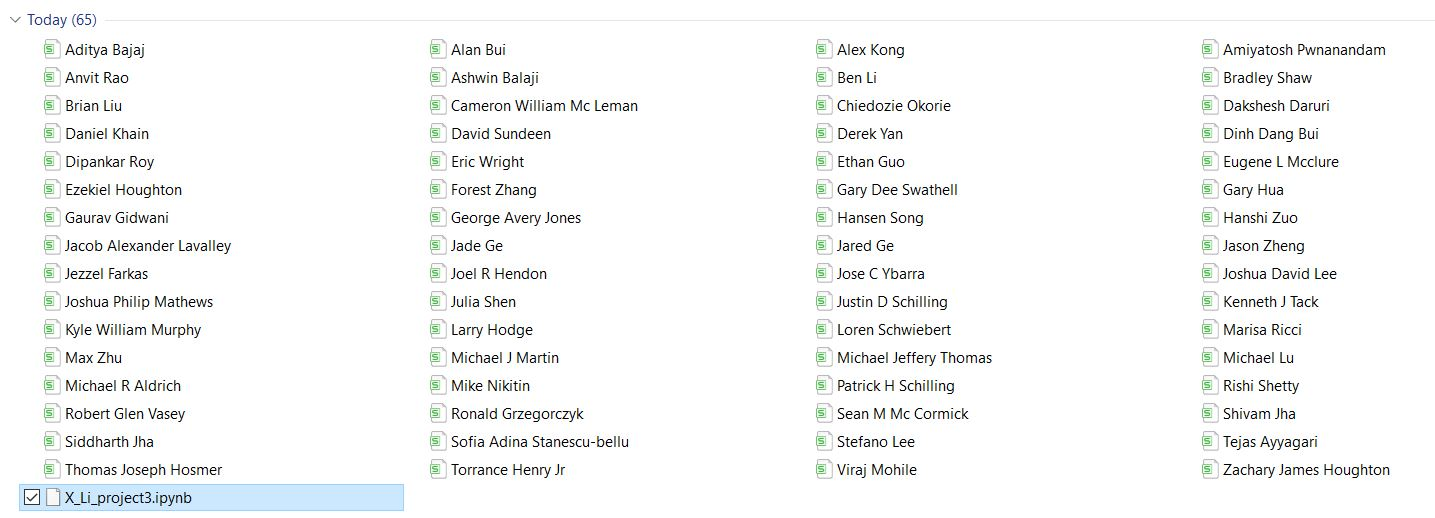

In [24]:
# show result on the local path
from IPython.display import Image
Image(filename='C://AI program//(1)data aquisition& Management//ninth week//project_csv_result.jpg')

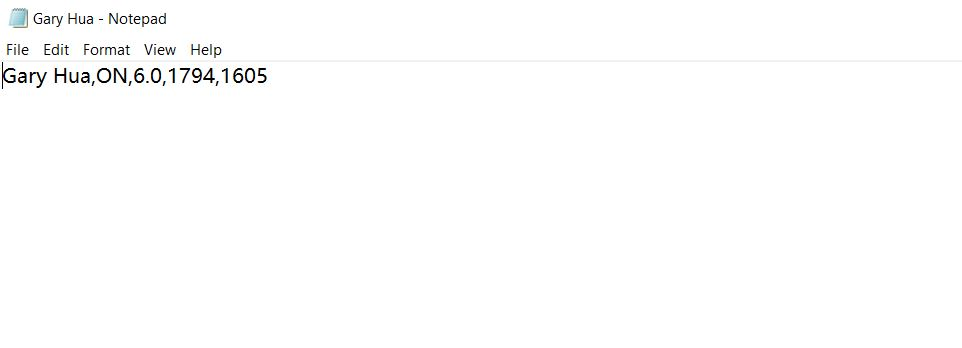

In [25]:
Image(filename='C://AI program//(1)data aquisition& Management//ninth week//Sample_GaryHua_csv_result.jpg')

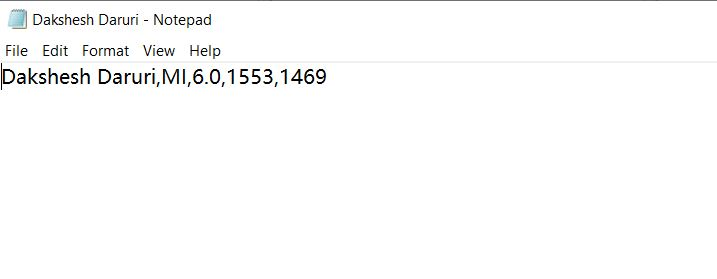

In [26]:
Image(filename='C://AI program//(1)data aquisition& Management//ninth week//Sample_DaksheshDaruri_csv_result.jpg')